In [9]:
# Gender-Based Violence and Femicide

# %% Imports & global style
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from highlight_text import fig_text

# Global style
sns.set_theme(style="white", context="notebook")

mpl.rcParams.update({
    "figure.figsize": (12, 4),
    "figure.dpi": 150,
    "savefig.dpi": 350,       # sharper saved PNGs
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.autolayout": False,
})

# Common background colour
BG_WHITE = "#ffffff"

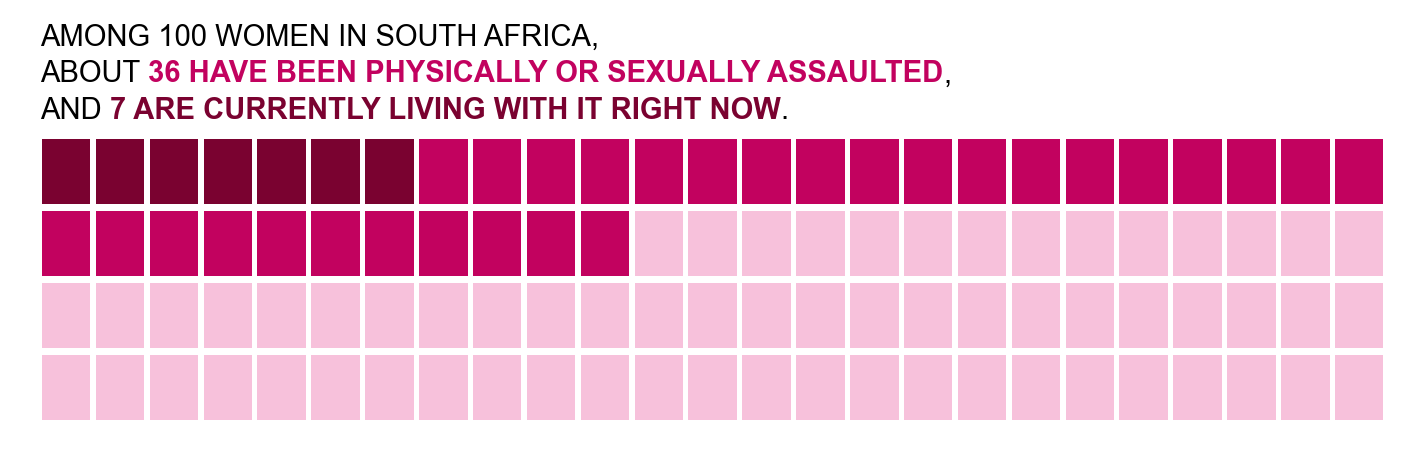

In [10]:
# %% DAY X – Among 100 women in South Africa (experience of violence)
country_label = "South Africa"

lifetime_prevalence = 0.355
past_year_prevalence = 0.07

n_total = 100
n_lifetime = int(round(lifetime_prevalence * n_total))
n_current = int(round(past_year_prevalence * n_total))
n_current = min(n_current, n_lifetime)

# grid layout: 4 rows x 25 cols = 100 squares
n_rows, n_cols = 4, 25
ids = np.arange(n_rows * n_cols)

df = pd.DataFrame({"id": ids})
# 0 = never, 1 = lifetime only, 2 = current
df["status"] = 0
df.loc[:n_lifetime - 1, "status"] = 1
df.loc[:n_current - 1, "status"] = 2

df["row"] = df["id"] // n_cols
df["col"] = df["id"] % n_cols
df["row"] = n_rows - 1 - df["row"]  # flip so first row at top

# colours
bg_color = BG_WHITE
never_color = "#f7c1db"   # light pink
current_color = "#7A0230" # dark maroon
lifetime_color = "#c2025f" # bright pink
title_color = "black"

fig, ax = plt.subplots(figsize=(10, 3), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

square_size = 0.9
for _, r in df.iterrows():
    if r["status"] == 2:
        color = current_color
    elif r["status"] == 1:
        color = lifetime_color
    else:
        color = never_color

    rect = plt.Rectangle(
        (r["col"], r["row"]),
        square_size,
        square_size,
        facecolor=color,
        edgecolor=None,
        linewidth=0
    )
    ax.add_patch(rect)

ax.set_xlim(-0.5, n_cols)
ax.set_ylim(-0.5, n_rows)
ax.set_xticks([])
ax.set_yticks([])

title_string = (
    "AMONG 100 WOMEN IN SOUTH AFRICA,\n"
    f"ABOUT <{n_lifetime} HAVE BEEN PHYSICALLY OR SEXUALLY ASSAULTED>,\n"
    f"AND <{n_current} ARE CURRENTLY LIVING WITH IT RIGHT NOW>."
)

fig_text(
    x=0.083,
    y=1.02,
    s=title_string,
    highlight_textprops=[
        {"color": lifetime_color, "weight": "bold"},
        {"color": current_color, "weight": "bold"},
    ],
    color=title_color,
    fontsize=14,
    va="top",
    fig=fig,
)

plt.tight_layout()
plt.savefig("img/dayX_exp_violence.png", bbox_inches="tight")
plt.show()

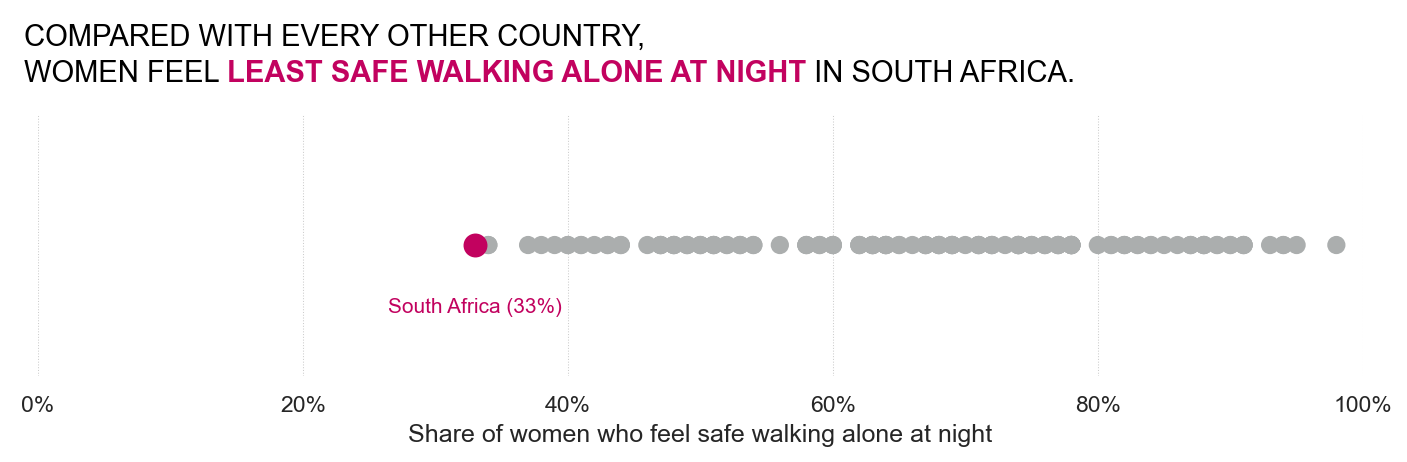

In [11]:
# %% DAY X – How safe do women feel walking home?
# Read your data
df = pd.read_excel("data/safe_walk_2024.xlsx")

# Make sure percentages are numeric
if df["safe_pct"].dtype == object:
    df["safe_pct"] = df["safe_pct"].str.rstrip("%").astype(float)

# Sort by value
df = df.sort_values("safe_pct")

base_color = "#ABAEAE"
highlight_color = "#c2025f"

colors = df["country"].apply(
    lambda c: highlight_color if c == "South Africa" else base_color
)

fig, ax = plt.subplots(figsize=(10, 3), facecolor=BG_WHITE)
ax.set_facecolor(BG_WHITE)

ax.scatter(df["safe_pct"], [0] * len(df), s=60, color=colors)

sa = df[df["country"] == "South Africa"]
ax.scatter(sa["safe_pct"], [0], s=110, color=highlight_color, zorder=3)

ax.set_yticks([])
ax.set_xlabel("Share of women who feel safe walking alone at night", fontsize=12)
ax.set_xlim(0, 100)
ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels(["0%", "20%", "40%", "60%", "80%", "100%"], fontsize=11)

ax.xaxis.grid(True, linestyle=":", linewidth=0.5)
for spine in ax.spines.values():
    spine.set_visible(False)

title = (
    "COMPARED WITH EVERY OTHER COUNTRY,\n"
    "WOMEN FEEL <LEAST SAFE WALKING ALONE AT NIGHT> IN SOUTH AFRICA."
)

fig_text(
    x=0.07,
    y=1,
    s=title,
    highlight_textprops=[
        {"color": highlight_color, "weight": "bold"},
    ],
    color="black",
    fontsize=14,
    va="top",
    fig=fig,
)

ax.text(
    sa["safe_pct"].iloc[0],
    -0.03,
    "South Africa (33%)",
    ha="center", va="bottom",
    fontsize=10,
    color=highlight_color
)

plt.tight_layout()
plt.savefig("img/dayX_feel_safe_global_dotplot.png", bbox_inches="tight")
plt.show()


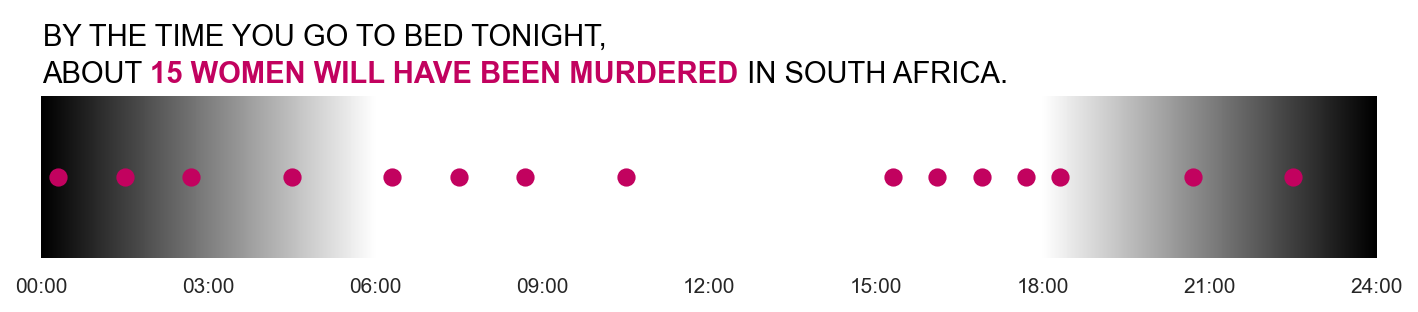

In [12]:
# %% DAY X – Number of women murdered per day (time of day)
annual_women_murdered = 5578  # 2023/24, women only
murders_per_day = annual_women_murdered / 365
murders_per_hour = murders_per_day / 24
hours_between = 1 / murders_per_hour
n_events = int(round(murders_per_day))   # ≈ 15 dots

# time-of-day distribution
time_bin_totals = np.array([3023, 2171, 2825, 1719, 1555, 1984, 3620, 3678])
time_bin_probs = time_bin_totals / time_bin_totals.sum()

time_bins = np.array([
    (0, 3),
    (3, 6),
    (6, 9),
    (9, 12),
    (12, 15),
    (15, 18),
    (18, 21),
    (21, 24),
])

rng = np.random.default_rng(42)

bin_counts = rng.multinomial(n_events, time_bin_probs)

event_times = []
for (start, end), k in zip(time_bins, bin_counts):
    if k == 0:
        continue
    margin = (end - start) * 0.1
    if k == 1:
        times_in_bin = [start + (end - start) / 2]
    else:
        times_in_bin = np.linspace(start + margin, end - margin, k)
    event_times.extend(times_in_bin)

event_times = np.array(sorted(event_times))

bg_color = BG_WHITE
dot_color = "#c2025f"
text_color = "#000000"

fig, ax = plt.subplots(figsize=(10, 2), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

# gradient background
x = np.linspace(0, 24, 500)
brightness = np.zeros_like(x)
for i, t in enumerate(x):
    if t < 6:
        brightness[i] = 0.2 + (t / 6) * 0.6
    elif t < 18:
        brightness[i] = 0.8
    else:
        brightness[i] = 0.8 - ((t - 18) / 6) * 0.6

gradient = np.tile(brightness, (2, 1))
ax.imshow(
    gradient,
    extent=[0, 24, -1, 1],
    origin="lower",
    aspect="auto",
    cmap="gray",
    zorder=0
)

ax.scatter(
    event_times,
    np.zeros_like(event_times),
    s=60,
    color=dot_color,
    zorder=2
)

ax.set_yticks([])
ax.set_ylim(-1, 1)
ax.set_xlim(0, 24)
ax.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
ax.set_xticklabels(
    ["00:00", "03:00", "06:00", "09:00",
     "12:00", "15:00", "18:00", "21:00", "24:00"],
    fontsize=10,
)

title = (
    "BY THE TIME YOU GO TO BED TONIGHT,\n"
    f"ABOUT <{murders_per_day:.0f} WOMEN WILL HAVE BEEN MURDERED> IN SOUTH AFRICA."
)

fig_text(
    x=0.075,
    y=1,
    s=title,
    highlight_textprops=[
        {"color": dot_color, "weight": "bold"},
    ],
    color=text_color,
    fontsize=14,
    va="top",
    fig=fig,
)

plt.tight_layout()
plt.savefig("img/dayX_murders_time_of_day.png", bbox_inches="tight")
plt.show()


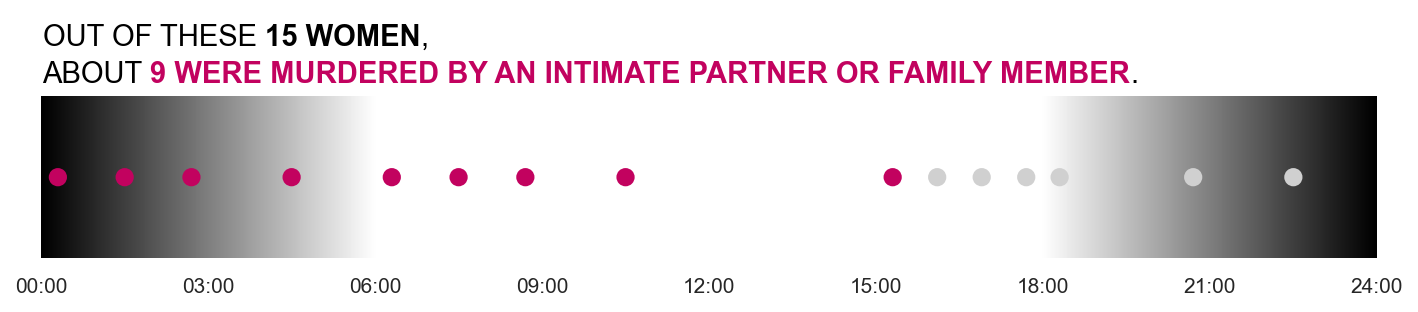

In [13]:
# %% DAY X – Who kills women? (partner/family vs others)
n_ip_family = int(round(0.6 * n_events))
n_other = n_events - n_ip_family

dot_color_ip = "#c2025f"
dot_color_other = "#d0d0d0"

colors = np.array([dot_color_other] * len(event_times))
colors[:n_ip_family] = dot_color_ip

bg_color = BG_WHITE
text_color = "#000000"

fig, ax = plt.subplots(figsize=(10, 2), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

# same gradient as previous
x = np.linspace(0, 24, 500)
brightness = np.zeros_like(x)
for i, t in enumerate(x):
    if t < 6:
        brightness[i] = 0.2 + (t / 6) * 0.6
    elif t < 18:
        brightness[i] = 0.8
    else:
        brightness[i] = 0.8 - ((t - 18) / 6) * 0.6

gradient = np.tile(brightness, (2, 1))
ax.imshow(
    gradient,
    extent=[0, 24, -1, 1],
    origin="lower",
    aspect="auto",
    cmap="gray",
    zorder=0
)

ax.scatter(
    event_times,
    np.zeros_like(event_times),
    s=60,
    color=colors,
    zorder=2
)

ax.set_yticks([])
ax.set_ylim(-1, 1)
ax.set_xlim(0, 24)
ax.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
ax.set_xticklabels(
    ["00:00", "03:00", "06:00", "09:00",
     "12:00", "15:00", "18:00", "21:00", "24:00"],
    fontsize=10,
)

title = (
    f"OUT OF THESE <{n_events} WOMEN>,\n"
    f"ABOUT <{n_ip_family} WERE MURDERED BY AN INTIMATE PARTNER OR FAMILY MEMBER>."
)

fig_text(
    x=0.075,
    y=1,
    s=title,
    highlight_textprops=[
        {"color": text_color, "weight": "bold"},
        {"color": dot_color_ip, "weight": "bold"},
    ],
    color=text_color,
    fontsize=14,
    va="top",
    fig=fig,
)

plt.tight_layout()
plt.savefig("img/dayX_murders_who_kills.png", bbox_inches="tight")
plt.show()

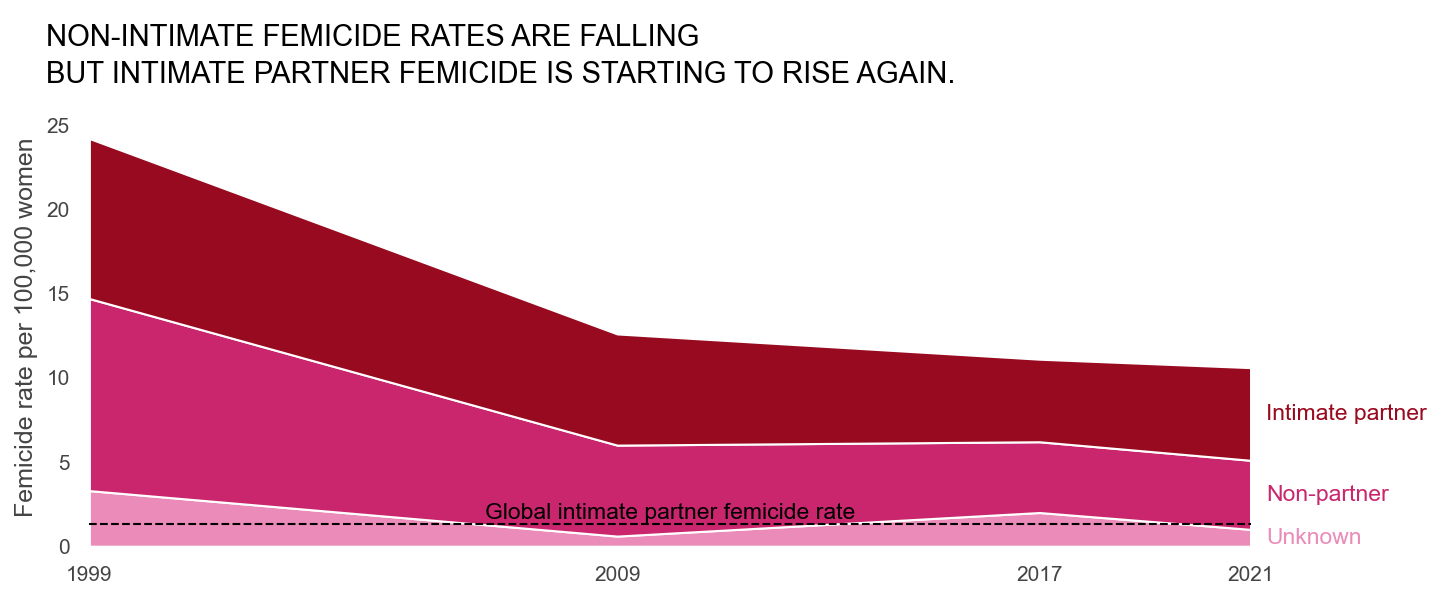

In [14]:
# %% DAY X – Femicide trends over time (stacked rates)
years = np.array([1999, 2009, 2017, 2021])

overall = np.array([24.2, 12.6, 11.1, 10.6])
ipf = np.array([9.5, 6.6, 4.9, 5.5])
nipf = np.array([11.4, 5.4, 4.2, 4.1])
other = overall - ipf - nipf

col_other = "#ea8bb9"
col_nipf = "#c9266d"
col_ipf = "#980a1f"

bg_color = BG_WHITE
axis_color = "#444444"

fig, ax = plt.subplots(figsize=(10, 4), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.stackplot(
    years,
    other, nipf, ipf,
    colors=[col_other, col_nipf, col_ipf]
)

ax.set_xlim(1999, 2022)
ax.set_ylim(0, 26)

ax.set_xticks([1999, 2009, 2017, 2021])
ax.set_xticklabels(["1999", "2009", "2017", "2021"], fontsize=10)

ax.set_yticks([0, 5, 10, 15, 20, 25])
ax.set_yticklabels([0, 5, 10, 15, 20, 25], fontsize=10)
ax.set_ylabel("Femicide rate per 100,000 women", color=axis_color, fontsize=12)
ax.tick_params(axis="both", colors=axis_color)

global_ip_rate = 1.3
ax.hlines(
    y=global_ip_rate,
    xmin=1999,
    xmax=2021,
    color="#000000",
    linestyle="--",
    linewidth=1,
)

ax.text(
    2010, global_ip_rate + 0.1,
    "Global intimate partner femicide rate",
    va="bottom", ha="center",
    fontsize=11, color="#000000"
)

last_year_x = years[-1] + 0.3
other_last = other[-1]
nipf_last = nipf[-1]
ipf_last = ipf[-1]

bottom_other = 0
top_other = other_last

bottom_nipf = top_other
top_nipf = top_other + nipf_last

bottom_ipf = top_nipf
top_ipf = top_nipf + ipf_last

y_other = (bottom_other + top_other) / 2
y_nipf = (bottom_nipf + top_nipf) / 2
y_ipf = (bottom_ipf + top_ipf) / 2

ax.text(
    last_year_x, y_ipf,
    "Intimate partner",
    va="center", ha="left",
    fontsize=11, color=col_ipf
)
ax.text(
    last_year_x, y_nipf,
    "Non-partner",
    va="center", ha="left",
    fontsize=11, color=col_nipf
)
ax.text(
    last_year_x, y_other,
    "Unknown",
    va="center", ha="left",
    fontsize=11, color=col_other
)

title = (
    "NON-INTIMATE FEMICIDE RATES ARE FALLING\n"
    "BUT INTIMATE PARTNER FEMICIDE IS STARTING TO RISE AGAIN."
)

fig_text(
    x=0.06,
    y=0.98,
    s=title,
    color="black",
    fontsize=14,
    va="top",
    fig=fig,
)

plt.tight_layout()
plt.savefig("img/dayX_femicide_trends_stack.png", bbox_inches="tight")
plt.show()

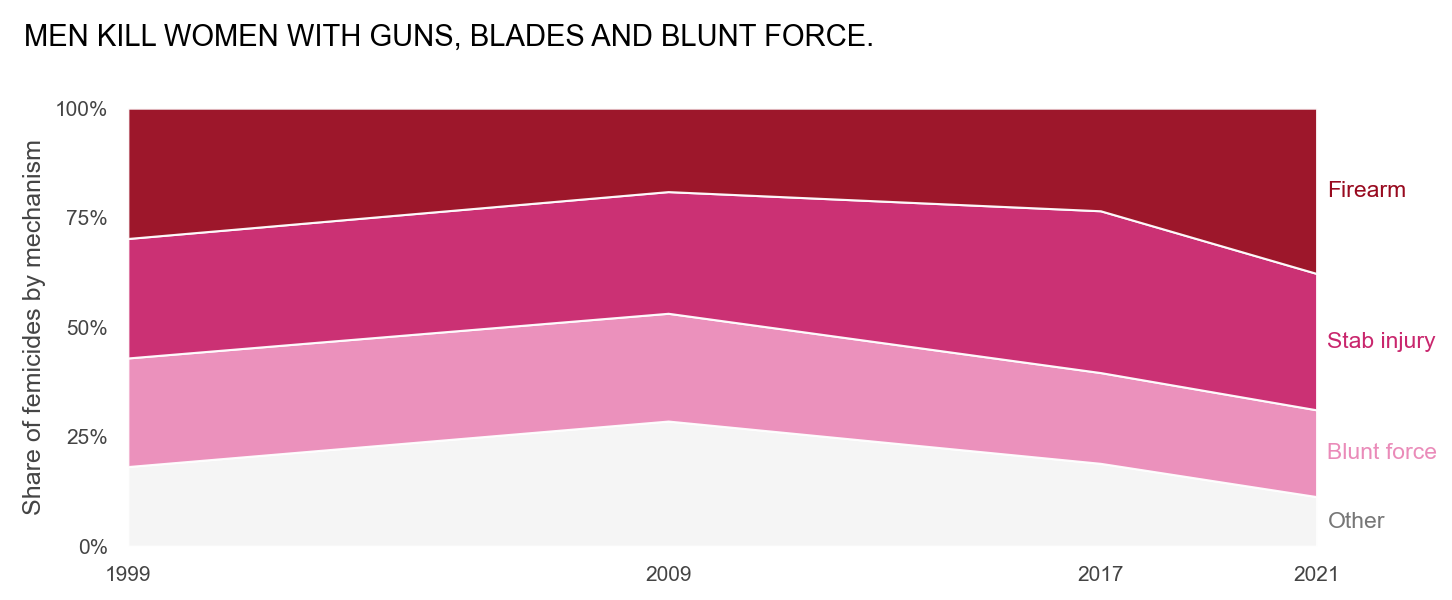

In [15]:
# %% DAY X – How are women killed? (mechanism shares)
years = np.array([1999, 2009, 2017, 2021])
overall = np.array([24.2, 12.6, 11.1, 10.6])
firearm = np.array([7.2, 2.4, 2.6, 4.0])
stab = np.array([6.6, 3.5, 4.1, 3.3])
blunt = np.array([6.0, 3.1, 2.3, 2.1])

other_mech = overall - (firearm + stab + blunt)

share_firearm = firearm / overall
share_stab = stab / overall
share_blunt = blunt / overall
share_other_mech = other_mech / overall

col_firearm = "#980a1f"
col_stab = "#c9266d"
col_blunt = "#ea8bb9"
col_other_mech = "#f5f5f5"
bg_color = BG_WHITE
axis_color = "#444444"

fig, ax = plt.subplots(figsize=(10, 4), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.stackplot(
    years,
    share_other_mech,
    share_blunt,
    share_stab,
    share_firearm,
    colors=[col_other_mech, col_blunt, col_stab, col_firearm],
    alpha=0.95
)

ax.set_xlim(1999, 2021)
ax.set_ylim(0, 1)

ax.set_xticks([1999, 2009, 2017, 2021])
ax.set_xticklabels(["1999", "2009", "2017", "2021"], fontsize=10)

ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(["0%", "25%", "50%", "75%", "100%"], fontsize=10)
ax.set_ylabel("Share of femicides by mechanism", color=axis_color, fontsize=12)
ax.tick_params(axis="both", colors=axis_color)

x_label = 2021.2

sf_last = share_firearm[-1]
ss_last = share_stab[-1]
sb_last = share_blunt[-1]
so_last = share_other_mech[-1]

bottom_other = 0
top_other = so_last

bottom_blunt = top_other
top_blunt = top_other + sb_last

bottom_stab = top_blunt
top_stab = top_blunt + ss_last

bottom_fire = top_stab
top_fire = top_stab + sf_last

ax.text(
    x_label, (bottom_fire + top_fire) / 2,
    "Firearm",
    va="center", ha="left",
    fontsize=11, color=col_firearm
)
ax.text(
    x_label, (bottom_stab + top_stab) / 2,
    "Stab injury",
    va="center", ha="left",
    fontsize=11, color=col_stab
)
ax.text(
    x_label, (bottom_blunt + top_blunt) / 2,
    "Blunt force",
    va="center", ha="left",
    fontsize=11, color=col_blunt
)
ax.text(
    x_label, (bottom_other + top_other) / 2,
    "Other",
    va="center", ha="left",
    fontsize=11, color="#777777"
)

title = "MEN KILL WOMEN WITH GUNS, BLADES AND BLUNT FORCE."

fig_text(
    x=0.04,
    y=0.98,
    s=title,
    color="black",
    fontsize=14,
    va="top",
    fig=fig,
)

plt.tight_layout()
plt.savefig("img/dayX_how_are_women_killed_shares.png", bbox_inches="tight")
plt.show()

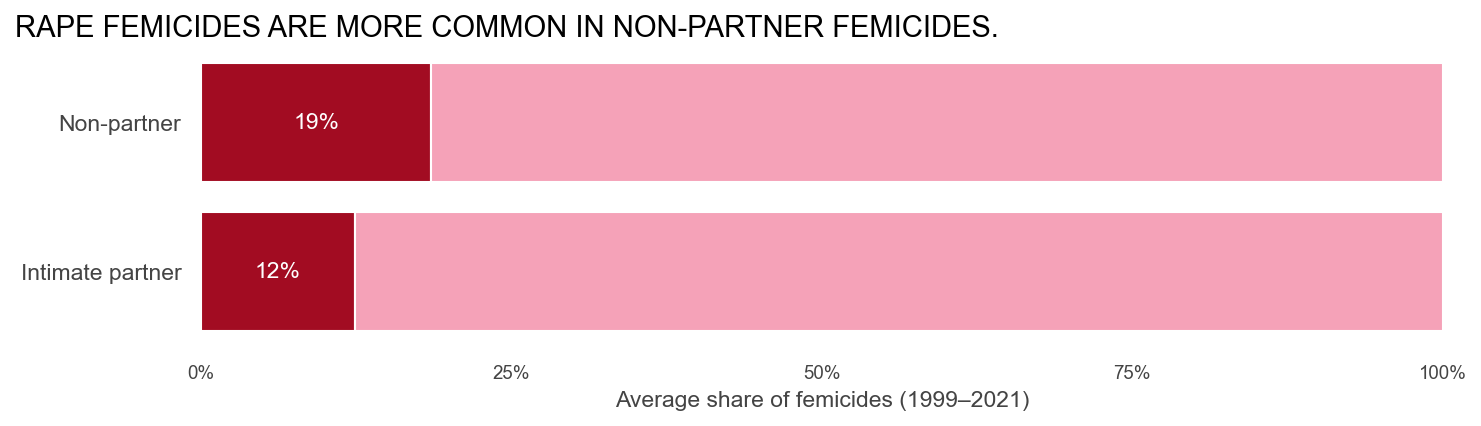

In [16]:
# %% DAY X – Rape femicides (average shares)
t6 = pd.read_csv("data/convictions.csv")


def point_estimate(s):
    if isinstance(s, str):
        token = s.split()[0].strip("()")
        try:
            return float(token)
        except ValueError:
            return np.nan
    return np.nan


years = np.array([1999, 2009, 2017, 2020])
IPF_cols = ["Intimate partner femicide", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
NIPF_cols = ["Non-intimate partner femicide", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8"]

row_rape = t6[t6["Characteristic"] == "Rape femicides"].iloc[0]
ipf_rape = np.array([point_estimate(row_rape[c]) for c in IPF_cols])
nipf_rape = np.array([point_estimate(row_rape[c]) for c in NIPF_cols])

mean_ipf_rape = np.nanmean(ipf_rape)
mean_nipf_rape = np.nanmean(nipf_rape)

ipf_rape_share = mean_ipf_rape
ipf_not_rape = 100 - mean_ipf_rape

nipf_rape_share = mean_nipf_rape
nipf_not_rape = 100 - mean_nipf_rape

labels = ["Intimate partner", "Non-partner"]
rape_values = np.array([ipf_rape_share, nipf_rape_share])
not_rape_values = np.array([ipf_not_rape, nipf_not_rape])

y_pos = np.arange(len(labels))

bg_color = BG_WHITE
rape_color = "#a20c22"
not_rape_color = "#f5a2b8"
axis_color = "#444444"

fig, ax = plt.subplots(figsize=(10, 3), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.barh(y_pos, rape_values, color=rape_color, height=0.8, label="Includes rape")
ax.barh(
    y_pos,
    not_rape_values,
    left=rape_values,
    color=not_rape_color,
    height=0.8,
    label="No evidence of rape",
)

ax.set_yticks(y_pos)
ax.set_yticklabels(labels, fontsize=11)
ax.set_xlim(0, 100)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(["0%", "25%", "50%", "75%", "100%"], fontsize=9)
ax.tick_params(axis="x", colors=axis_color)
ax.tick_params(axis="y", colors=axis_color)

ax.set_xlabel("Average share of femicides (1999–2021)", fontsize=11, color=axis_color)

for y, rv in zip(y_pos, rape_values):
    ax.text(
        rv / 2,
        y,
        f"{rv:.0f}%",
        ha="center", va="center",
        fontsize=11,
        color="white",
    )

ax.set_title(
    "RAPE FEMICIDES ARE MORE COMMON IN NON-PARTNER FEMICIDES.",
    x=-0.15,
    y=1,
    loc="left",
    fontsize=14,
    color="black",
)

plt.tight_layout()
plt.savefig("img/dayX_rape_femicides_avg.png", bbox_inches="tight")
plt.show()

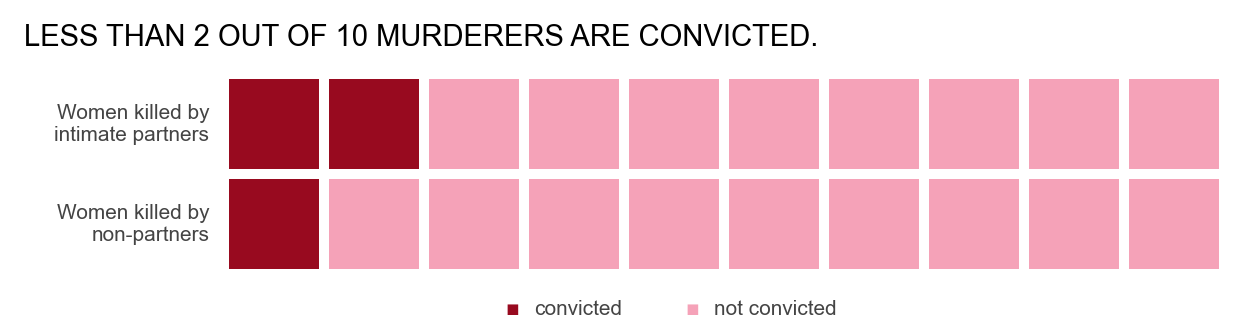

In [17]:
# %% DAY X – Convictions (less than 2 in 10)
n_cols = 10
ipf_convicted = 2
nipf_convicted = 1

row_centers = np.repeat([1, 0], n_cols)
cols = np.tile(np.arange(n_cols), 2)

status_ipf = [1] * ipf_convicted + [0] * (n_cols - ipf_convicted)
status_nipf = [1] * nipf_convicted + [0] * (n_cols - nipf_convicted)
status = status_ipf + status_nipf

df_conv = pd.DataFrame({
    "row_center": row_centers,
    "col": cols,
    "status": status
})

bg_color = BG_WHITE
convicted_color = "#980a1f"
not_conv_color = "#f5a2b8"
title_color = "black"

fig, ax = plt.subplots(figsize=(10, 4), facecolor=bg_color)
ax.set_facecolor(bg_color)

fig.subplots_adjust(left=0.15, right=0.97, top=0.7, bottom=0.3)

for spine in ax.spines.values():
    spine.set_visible(False)

square_size = 0.9

for _, r in df_conv.iterrows():
    color = convicted_color if r["status"] == 1 else not_conv_color
    y0 = r["row_center"] - square_size / 2
    rect = plt.Rectangle(
        (r["col"], y0),
        square_size,
        square_size,
        facecolor=color,
        edgecolor=None,
        linewidth=0
    )
    ax.add_patch(rect)

ax.set_xlim(-0.8, n_cols - 0.1)
ax.set_ylim(-0.7, 1.7)
ax.set_aspect("equal")
ax.set_xticks([])
ax.set_yticks([])

label_x = -0.2
ax.text(
    label_x, 1,
    "Women killed by\nintimate partners",
    ha="right", va="center",
    fontsize=10, color="#444444"
)
ax.text(
    label_x, 0,
    "Women killed by\nnon-partners",
    ha="right", va="center",
    fontsize=10, color="#444444"
)

center_x = (n_cols - 1) / 2
legend_y = -0.4

conv_icon_x = center_x - 1.6
conv_text_x = conv_icon_x + 0.15

ax.text(conv_icon_x, legend_y - 0.45, "■", color=convicted_color,
        ha="right", va="center", fontsize=11)
ax.text(conv_text_x, legend_y - 0.45, "convicted",
        ha="left", va="center", fontsize=10, color="#444444")

not_icon_x = center_x + 0.2
not_text_x = not_icon_x + 0.15

ax.text(not_icon_x, legend_y - 0.45, "■", color=not_conv_color,
        ha="right", va="center", fontsize=11)
ax.text(not_text_x, legend_y - 0.45, "not convicted",
        ha="left", va="center", fontsize=10, color="#444444")

title = "LESS THAN 2 OUT OF 10 MURDERERS ARE CONVICTED."
fig_text(
    x=0.12,
    y=0.75,
    s=title,
    color=title_color,
    fontsize=14,
    va="top",
    fig=fig,
)

plt.savefig("img/dayX_convictions.png", bbox_inches="tight")
plt.show()

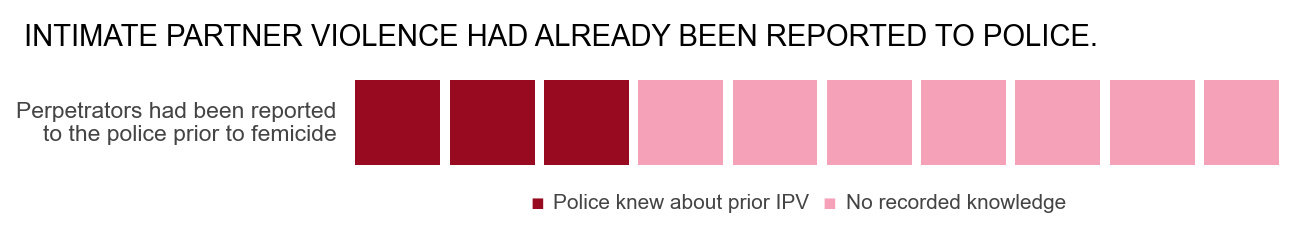

In [18]:
# %% DAY X – Prior IPV known to police
n_cols = 10
known_prior_ipv = 3

row_center = 0

cols = np.arange(n_cols)
rows = np.full(n_cols, row_center)
status = [1] * known_prior_ipv + [0] * (n_cols - known_prior_ipv)

df_prior = pd.DataFrame({
    "row_center": rows,
    "col": cols,
    "status": status
})

bg_color = BG_WHITE
known_color = "#980a1f"
unknown_color = "#f5a2b8"
title_color = "black"

fig, ax = plt.subplots(figsize=(10, 2.2), facecolor=bg_color)
ax.set_facecolor(bg_color)

fig.subplots_adjust(left=0.15, right=0.97, top=0.7, bottom=0.3)

for spine in ax.spines.values():
    spine.set_visible(False)

square_size = 0.9

for _, r in df_prior.iterrows():
    color = known_color if r["status"] == 1 else unknown_color
    y0 = r["row_center"] - square_size / 2
    rect = plt.Rectangle(
        (r["col"], y0),
        square_size,
        square_size,
        facecolor=color,
        edgecolor=None,
        linewidth=0
    )
    ax.add_patch(rect)

ax.set_xlim(-0.6, n_cols - 0.2)
ax.set_ylim(-0.7, 0.7)
ax.set_aspect("equal")
ax.set_xticks([])
ax.set_yticks([])

ax.text(
    -0.2, 0,
    "Perpetrators had been reported\nto the police prior to femicide",
    ha="right", va="center",
    fontsize=11, color="#444444"
)

center_x = (n_cols - 1) / 2
legend_y = -0.85

ax.text(center_x - 2.5, legend_y, "■", color=known_color,
        ha="right", va="center", fontsize=11)
ax.text(center_x - 2.4, legend_y, "Police knew about prior IPV",
        ha="left", va="center", fontsize=10, color="#444444")

ax.text(center_x + 0.6, legend_y, "■", color=unknown_color,
        ha="right", va="center", fontsize=11)
ax.text(center_x + 0.7, legend_y, "No recorded knowledge",
        ha="left", va="center", fontsize=10, color="#444444")

title = "INTIMATE PARTNER VIOLENCE HAD ALREADY BEEN REPORTED TO POLICE."
fig_text(
    x=0.05,
    y=0.8,
    s=title,
    color=title_color,
    fontsize=14,
    va="top",
    fig=fig,
)

plt.savefig("img/dayX_prior_ipv_knowledge.png", bbox_inches="tight")
plt.show()

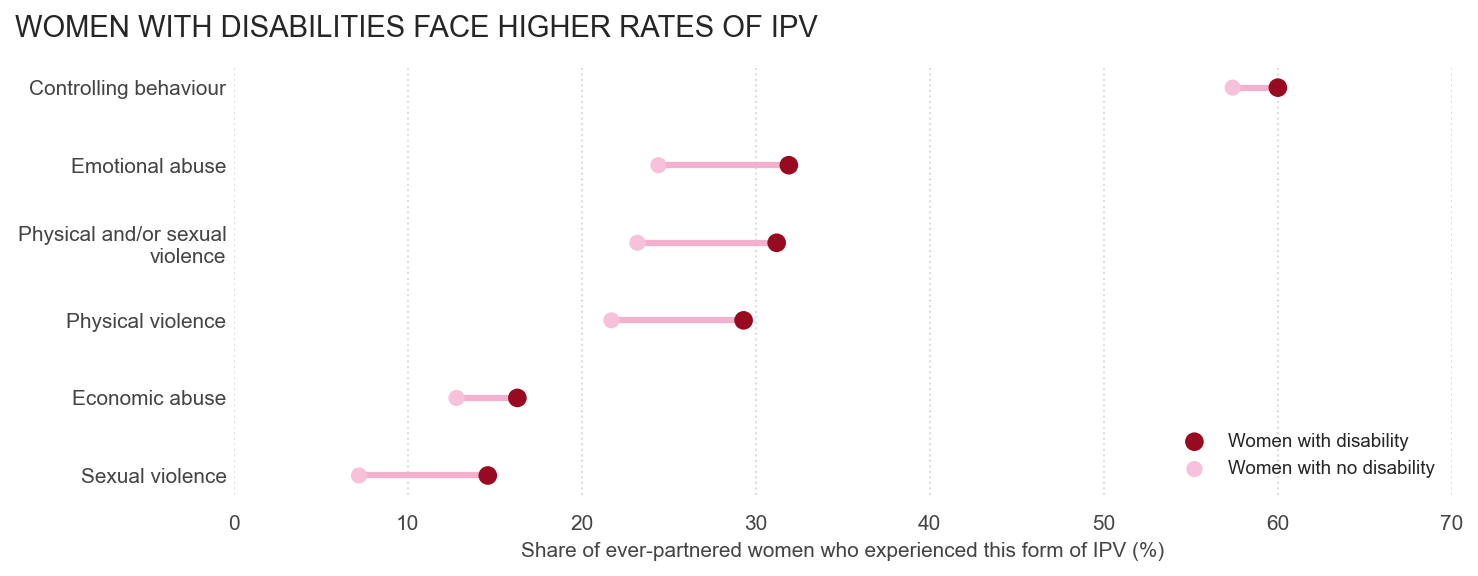

In [19]:
# %% DAY X – Women with disabilities and IPV (lollipop)
data = {
    "category": [
        "Physical violence",
        "Physical and/or sexual\nviolence",
        "Sexual violence",
        "Emotional abuse",
        "Economic abuse",
        "Controlling behaviour"
    ],
    "with_disability": [29.3, 31.2, 14.6, 31.9, 16.3, 60.0],
    "no_disability": [21.7, 23.2, 7.2, 24.4, 12.8, 57.4],
}

df_dis = pd.DataFrame(data)

df_dis = df_dis.sort_values("with_disability", ascending=True).reset_index(drop=True)

y_pos = np.arange(len(df_dis))

bg_color = BG_WHITE
line_color = "#f3b0cf"
dis_color = "#980a1f"
nodis_color = "#f7c1db"
axis_color = "#444444"
grid_color = "#dddddd"

fig, ax = plt.subplots(figsize=(10, 4), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)

for i, row in df_dis.iterrows():
    x1 = row["no_disability"]
    x2 = row["with_disability"]
    xmin, xmax = sorted([x1, x2])

    ax.hlines(
        y=y_pos[i],
        xmin=xmin,
        xmax=xmax,
        color=line_color,
        linewidth=3,
        zorder=1
    )

    ax.scatter(
        row["with_disability"],
        y_pos[i],
        s=80,
        color=dis_color,
        edgecolor="none",
        zorder=3,
        label="Women with disability" if i == 0 else None
    )

    ax.scatter(
        row["no_disability"],
        y_pos[i],
        s=60,
        color=nodis_color,
        edgecolor="none",
        zorder=3,
        label="Women with no disability" if i == 0 else None
    )

ax.set_yticks(y_pos)
ax.set_yticklabels(df_dis["category"], fontsize=10, color=axis_color)

ax.set_xlabel(
    "Share of ever-partnered women who experienced this form of IPV (%)",
    fontsize=10, color=axis_color
)

ax.set_xlim(0, 70)

ax.xaxis.grid(True, linestyle=":", color=grid_color)
ax.tick_params(axis="x", colors=axis_color)
ax.tick_params(axis="y", length=0)

handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(
    unique.values(),
    unique.keys(),
    loc="lower right",
    frameon=False,
    fontsize=9
)

title = "WOMEN WITH DISABILITIES FACE HIGHER RATES OF IPV"
ax.set_title(title, fontsize=14, pad=15, x=0.15)

plt.tight_layout()
plt.savefig("img/dayX_women_disability_ipv_lollipop.png", bbox_inches="tight")
plt.show()

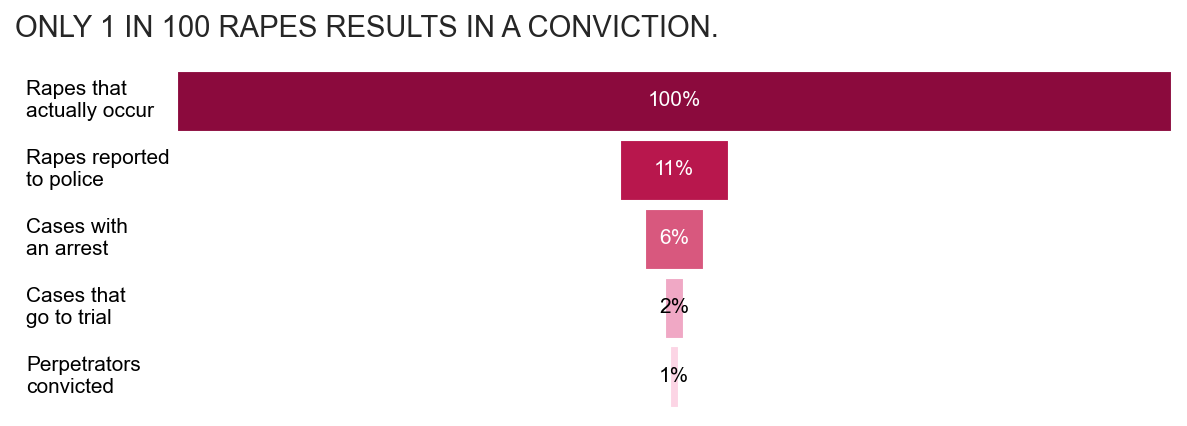

In [20]:
# %% DAY X – Rape justice funnel (1 in 100)
stages = [
    "Rapes that\nactually occur",
    "Rapes reported\nto police",
    "Cases with\nan arrest",
    "Cases that\ngo to trial",
    "Perpetrators\nconvicted"
]

values = np.array([100, 11, 6, 2, 1], dtype=float)
percents = values / values[0] * 100

colors = ["#8B0A3D", "#B8174D", "#D8587E", "#F0A8C5", "#FCD5E5"]

bg_color = BG_WHITE
text_color = "#000000"

fig, ax = plt.subplots(figsize=(8, 3), facecolor=bg_color)
ax.set_facecolor(bg_color)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

y = np.arange(len(stages))[::-1]
max_width = values[0]

for i, (stage, val, pct, col, yi) in enumerate(zip(stages, values, percents, colors, y)):
    left = -val / 2
    ax.barh(
        yi,
        width=val,
        height=0.9,
        left=left,
        color=col,
        edgecolor="white",
        linewidth=1.5,
        zorder=2
    )

    ax.text(
        -max_width * 0.65,
        yi,
        stage,
        ha="left", va="center",
        fontsize=10,
        color=text_color
    )

    ax.text(
        0, yi,
        f"{pct:.0f}%",
        ha="center", va="center",
        fontsize=10,
        color="white" if i <= 2 else text_color,
    )

ax.set_xlim(-max_width * 0.65, max_width * 0.5)
ax.set_ylim(-0.5, len(stages) - 0.5)

ax.set_title(
    "ONLY 1 IN 100 RAPES RESULTS IN A CONVICTION.",
    fontsize=14, loc="left", pad=14, x=-0.01
)

plt.tight_layout()
plt.savefig("img/dayX_rape_funnel.png", bbox_inches="tight")
plt.show()

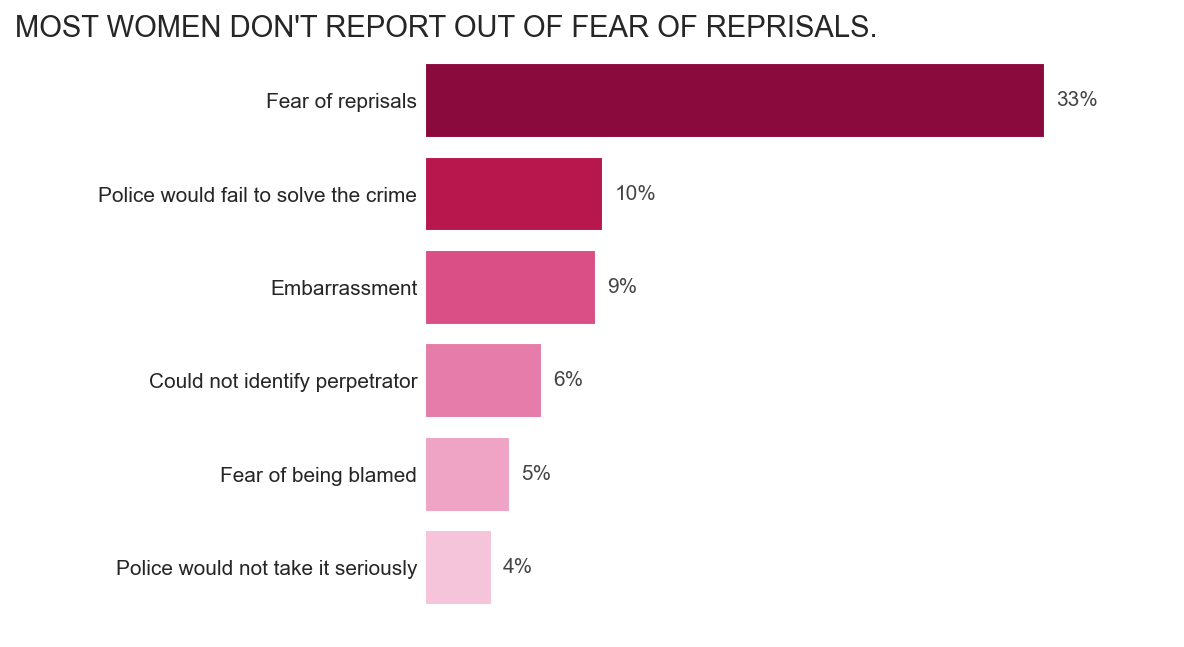

In [21]:
# %% DAY X – Why survivors don't report
labels = [
    "Fear of reprisals",
    "Police would fail to solve the crime",
    "Embarrassment",
    "Could not identify perpetrator",
    "Fear of being blamed",
    "Police would not take it seriously",
]

values = np.array([33.3, 9.6, 9.2, 6.3, 4.6, 3.6])

order = np.argsort(values)[::-1]
labels = [labels[i] for i in order]
values = values[order]

bg_color = BG_WHITE
axis_color = "#444444"

palette = ["#8B0A3D", "#B8174D", "#D94F86", "#E57CA9", "#EFA4C5", "#F5C3DA", "#F0E4EE", "#E0D6E0"]
colors = [palette[i] for i in range(len(values))]

fig, ax = plt.subplots(figsize=(7.5, 4.5), facecolor=bg_color)
ax.set_facecolor(bg_color)

y = np.arange(len(labels))
ax.barh(y, values, color=colors)

ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=10)
ax.invert_yaxis()

for spine_name, spine in ax.spines.items():
    if spine_name in ["left", "right", "top", "bottom"]:
        spine.set_visible(False)

ax.tick_params(axis="y", length=0)
ax.tick_params(axis="x", which="both", left=False, bottom=False, top=False, labelbottom=False)

ax.set_xlim(0, 40)

for yi, v in zip(y, values):
    ax.text(v + 0.6, yi, f"{v:.0f}%", va="center", ha="left", fontsize=10, color=axis_color)

ax.set_title(
    "MOST WOMEN DON'T REPORT OUT OF FEAR OF REPRISALS.",
    fontsize=14,
    loc="left",
    pad=14,
    x=-0.55,
    y=0.95
)

plt.tight_layout()
plt.savefig("img/dayX_why_not_report_bars.png", bbox_inches="tight")
plt.show()

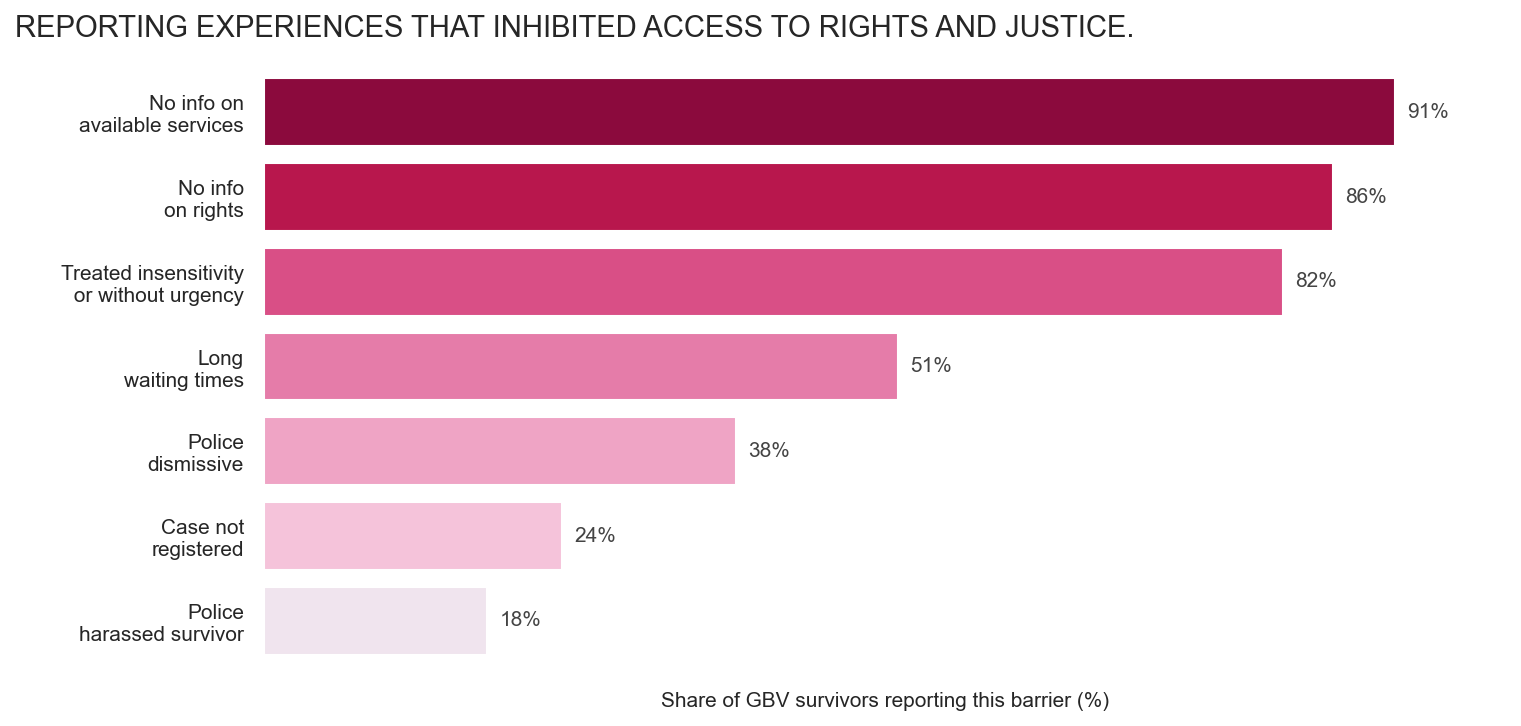

In [22]:
# %% DAY X – Barriers to justice & services
barriers = [
    "No info on\navailable services",
    "No info\non rights",
    "Treated insensitivity\n or without urgency",
    "Long\nwaiting times",
    "Police\ndismissive",
    "Case not\nregistered",
    "Police\nharassed survivor"
]

values = np.array([91, 86, 82, 51, 38, 24, 18])

order = np.argsort(values)[::-1]
barriers = [barriers[i] for i in order]
values = values[order]

bg_color = BG_WHITE
axis_color = "#444444"
palette = ["#8B0A3D", "#B8174D", "#D94F86", "#E57CA9", "#EFA4C5", "#F5C3DA", "#F0E4EE"]
colors = [palette[i] for i in range(len(values))]

fig, ax = plt.subplots(figsize=(10, 5), facecolor=bg_color)
ax.set_facecolor(bg_color)

y = np.arange(len(barriers))
ax.barh(y, values, color=colors)

ax.set_yticks(y)
ax.set_yticklabels(barriers, fontsize=10)
ax.invert_yaxis()

for spine_name, spine in ax.spines.items():
    if spine_name in ["top", "right", "left", "bottom"]:
        spine.set_visible(False)

ax.tick_params(axis="y", which="both", left=False)
ax.tick_params(axis="x", which="both", left=False, bottom=False, top=False, labelbottom=False)

ax.set_xlim(0, 100)
ax.set_xlabel("Share of GBV survivors reporting this barrier (%)", fontsize=10)

for yi, v in zip(y, values):
    ax.text(v + 1, yi, f"{v:.0f}%", va="center", ha="left", fontsize=10, color=axis_color)

ax.set_title(
    "REPORTING EXPERIENCES THAT INHIBITED ACCESS TO RIGHTS AND JUSTICE.",
    fontsize=14,
    loc="left",
    x=-0.2
)

plt.tight_layout()
plt.savefig("img/dayX_barriers_services.png", bbox_inches="tight")
plt.show()

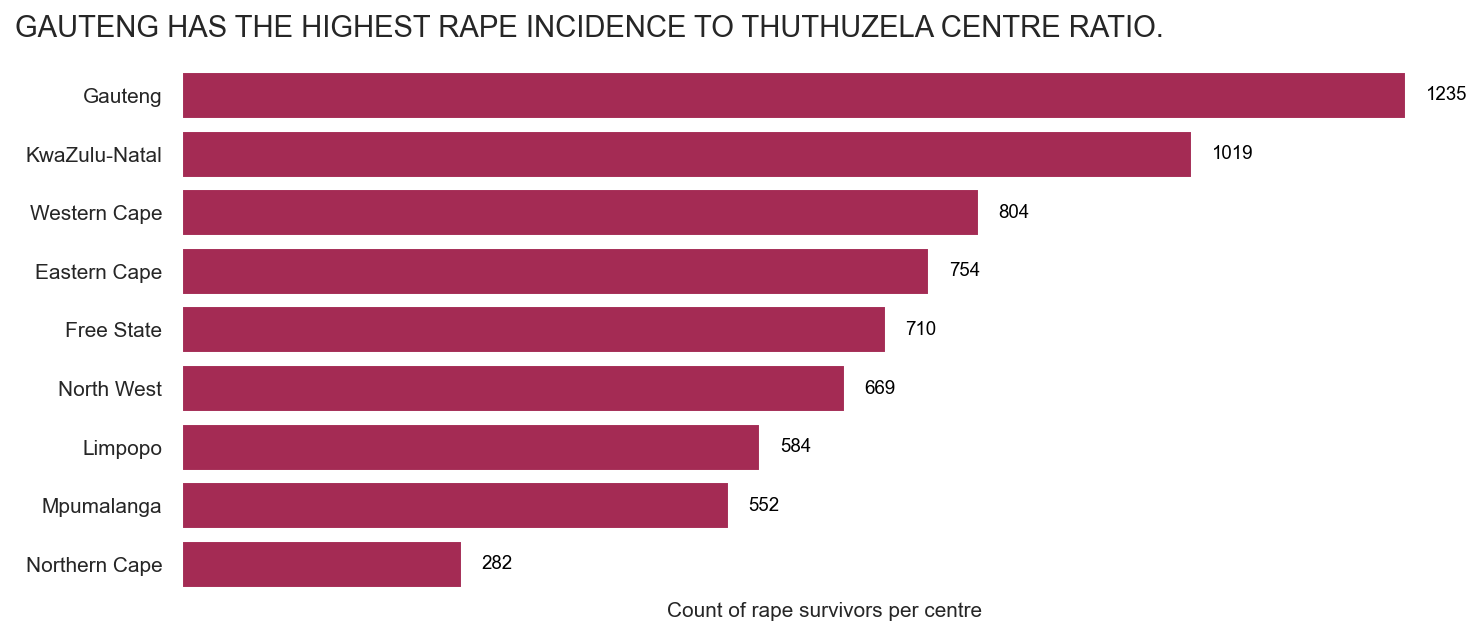

In [26]:
# %% DAY X – Rape cases per TCC by province
df = pd.read_csv(
    "data/Sexual_Offence_Crimes_Reported_per_province_2014-2024.csv",
    sep=";"
)

rape = df[
    (df["Crime Category"] == "Rape")
    & (df["Province"] != "Republic of South Africa")
].copy()

tcc_counts = {
    "Eastern Cape": 9,
    "Free State": 4,
    "Gauteng": 7,
    "KwaZulu-Natal": 8,
    "Limpopo": 7,
    "Mpumalanga": 5,
    "North West": 5,
    "Northern Cape": 4,
    "Western Cape": 6,
}

rape["TCCs"] = rape["Province"].map(tcc_counts)
rape = rape.dropna(subset=["TCCs"]).copy()
rape["cases_per_TCC"] = rape["2023/2024"] / rape["TCCs"]

plot_df = rape[["Province", "cases_per_TCC"]].sort_values(
    "cases_per_TCC", ascending=False
)

bg_color = BG_WHITE
color = "#B8174D"
text_color = "#000000"

fig, ax = plt.subplots(figsize=(10, 5), facecolor=bg_color)
ax.set_facecolor(bg_color)

sns.barplot(
    data=plot_df,
    y="Province",
    x="cases_per_TCC",
    color=color,
    ax=ax
)

ax.tick_params(axis="y", which="both", left=False)
ax.tick_params(axis="x", which="both", left=False, bottom=False, top=False, labelbottom=False)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xlabel("Count of rape survivors per centre", fontsize=10)
ax.set_ylabel("")
ax.set_title(
    "GAUTENG HAS THE HIGHEST RAPE INCIDENCE TO THUTHUZELA CENTRE RATIO.",
    fontsize=14,
    loc="left",
    pad=14,
    x=-0.13
)

for i, val in enumerate(plot_df["cases_per_TCC"]):
    ax.text(
        val + 20, i,
        f"{val:.0f}",
        va="center", ha="left",
        fontsize=9, color=text_color
    )

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.savefig("img/dayX_rape_per_TCC_by_province.png", bbox_inches="tight")
plt.show()

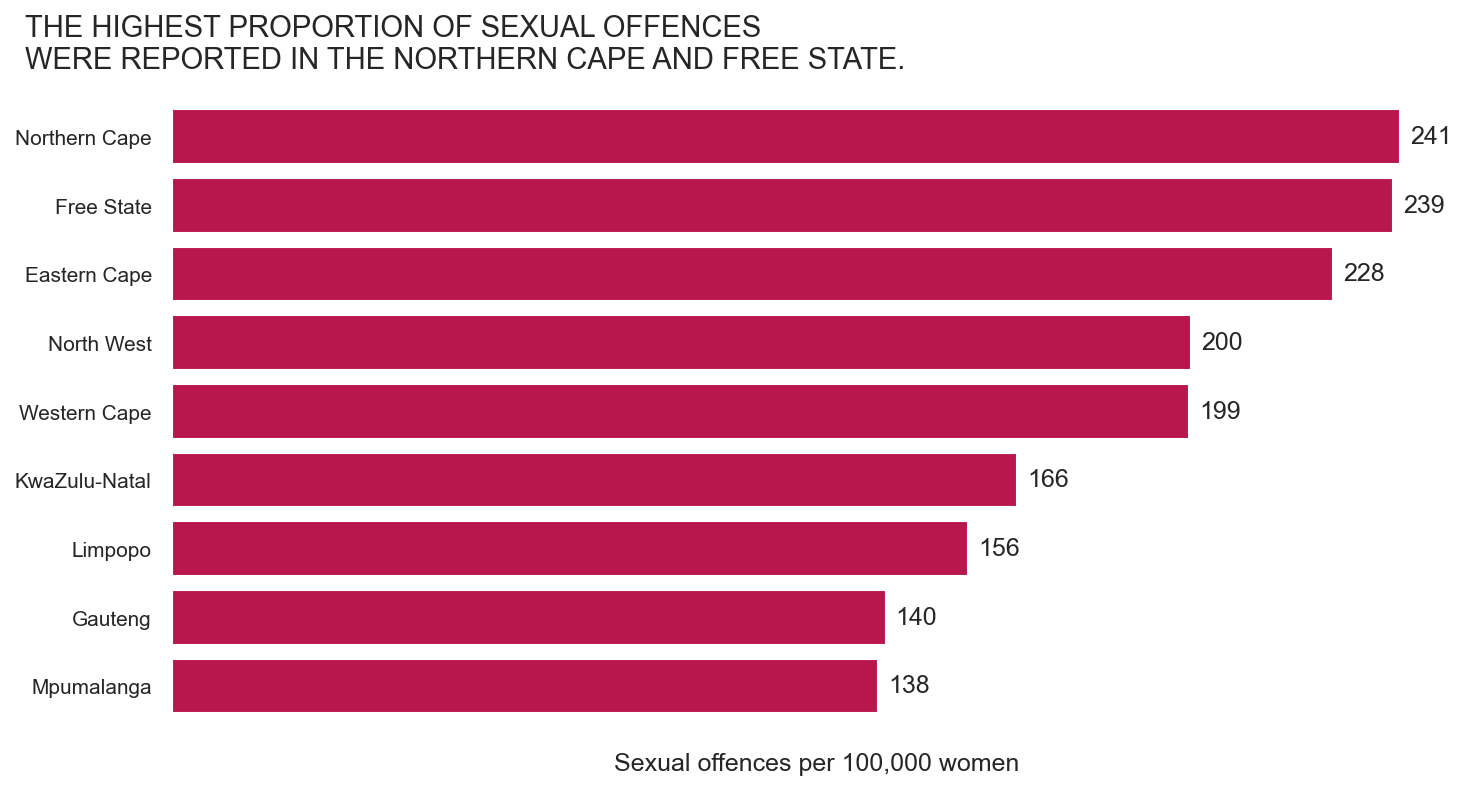

In [24]:
# %% DAY X – Sexual offences per 100k women by province
df = pd.read_csv(
    "data/Sexual_Offence_Crimes_Reported_per_province_2014-2024.csv",
    sep=";",
    engine="python",
)

year_col = "2023/2024"

offence_types = [
    "Rape",
    "Sexual assault",
    "Attempted sexual offences",
    "Contact sexual offences"
]

prov_df = (
    df[
        (df["Crime Category"].isin(offence_types)) &
        (df["Province"] != "Republic of South Africa")
    ]
    .groupby("Province")[year_col]
    .sum()
    .reset_index()
    .rename(columns={year_col: "total_sexual_offences"})
)

female_pop = pd.DataFrame({
    "Province": [
        "Eastern Cape",
        "Free State",
        "Gauteng",
        "KwaZulu-Natal",
        "Limpopo",
        "Mpumalanga",
        "North West",
        "Northern Cape",
        "Western Cape"
    ],
    "female_population": [
        3557567,
        1514385,
        7733504,
        6015451,
        3078423,
        2372580,
        2018143,
        652280,
        3551142,
    ]
})

merged = prov_df.merge(female_pop, on="Province", how="left")
assert merged["female_population"].isna().sum() == 0, "Fill all female_population values first!"

merged["offences_per_100k_women"] = (
    merged["total_sexual_offences"] / merged["female_population"] * 100_000
)

merged = merged.sort_values("offences_per_100k_women", ascending=False)

color = "#B8174D"

fig, ax = plt.subplots(figsize=(10, 5), facecolor=BG_WHITE)
ax.set_facecolor(BG_WHITE)

for spine in ax.spines.values():
    spine.set_visible(False)

y = np.arange(len(merged))
ax.barh(y, merged["offences_per_100k_women"], color=color)
ax.set_yticks(y)
ax.set_yticklabels(merged["Province"])
ax.invert_yaxis()

ax.tick_params(axis="y", which="both", left=False)
ax.set_xticks([])

ax.set_xlabel("Sexual offences per 100,000 women")

pos = ax.get_position()
fig.text(
    pos.x0 - 0.1,
    pos.y1 + 0.09,
    "THE HIGHEST PROPORTION OF SEXUAL OFFENCES\n"
    "WERE REPORTED IN THE NORTHERN CAPE AND FREE STATE.",
    ha="left", va="bottom",
    fontsize=14
)

for yi, v in zip(y, merged["offences_per_100k_women"]):
    ax.text(v + 2, yi, f"{v:.0f}", va="center")

plt.tight_layout()
plt.savefig("img/dayX_sexual_offences_per_100k_women.png", bbox_inches="tight")
plt.show()

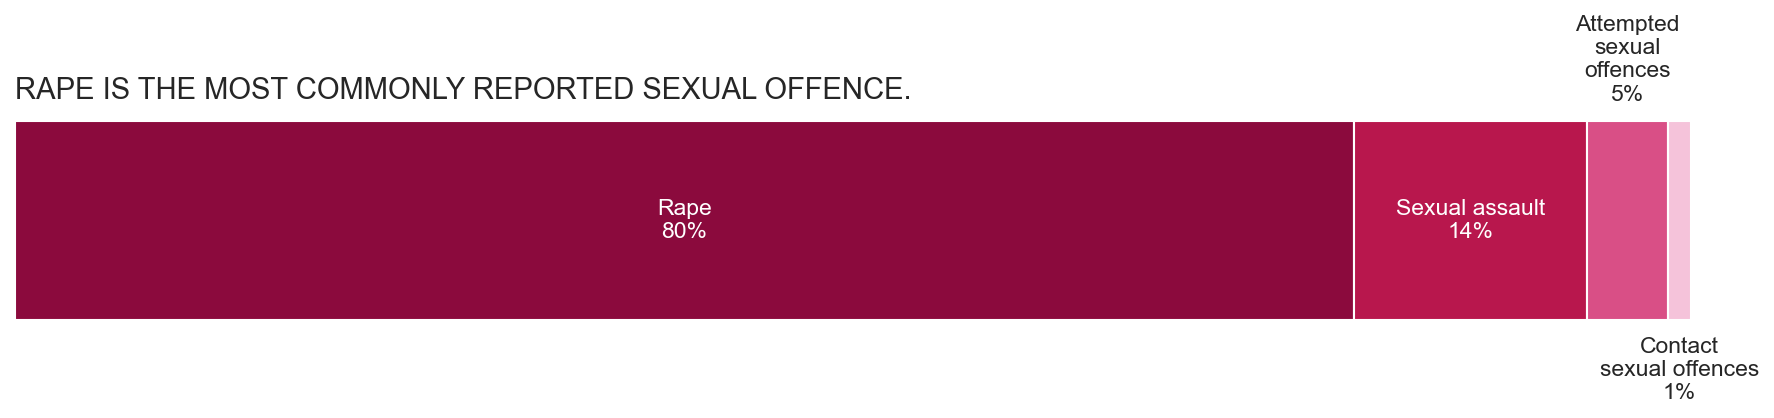

In [25]:
# %% DAY X – Composition of sexual offences
categories = [
    "Rape",
    "Sexual assault",
    "Attempted\nsexual\noffences",
    "Contact\nsexual offences",
]
values = np.array([42569, 7418, 2558, 740], dtype=float)

total = values.sum()
shares = values / total * 100

colors = ["#8B0A3D", "#B8174D", "#D94F86", "#F5C3DA"]

fig, ax = plt.subplots(figsize=(12, 3), facecolor=BG_WHITE)
ax.set_facecolor(BG_WHITE)

for spine in ax.spines.values():
    spine.set_visible(False)

left = 0
y_pos = 0

# for the small segments: first above, second below
small_offsets = [0.35, -0.35]   # relative to y_pos
small_idx = 0

for i, (cat, val, share, col) in enumerate(zip(categories, values, shares, colors)):
    ax.barh(
        y_pos,
        share,
        left=left,
        height=0.6,
        color=col
    )

    x_center = left + share / 2
    label_text = f"{cat}\n{share:.0f}%"

    if share > 8:
        # big chunks – label inside the bar
        ax.text(
            x_center,
            y_pos,
            label_text,
            ha="center",
            va="center",
            fontsize=11,
            color="white"
        )
    else:
        # small chunks – alternate above / below
        offset = small_offsets[small_idx]
        small_idx += 1

        y_text = y_pos + offset
        va = "bottom" if offset > 0 else "top"

        ax.annotate(
            label_text,
            xy=(x_center, y_pos),      # arrow tip at middle of segment
            xytext=(x_center, y_text), # text above or below
            textcoords="data",
            ha="center",
            va=va,
            fontsize=11,
        )

    left += share

ax.set_xlim(0, 100)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")

ax.set_title(
    "RAPE IS THE MOST COMMONLY REPORTED SEXUAL OFFENCE.",
    fontsize=14,
    loc="left",
)

plt.tight_layout()
plt.savefig("img/dayX_sexual_offences_composition.png", bbox_inches="tight")
plt.show()
